# Problem Set 6

See [Visualization Rules](https://datascience.quantecon.org/../applications/visualization_rules.html) and [Regression](https://datascience.quantecon.org/../applications/regression.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble

%matplotlib inline

This problem set uses data on insuree characteristics and medical costs. This is a public domain dataset downloaded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

The variables in the data are:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index of primary beneficiary
- children: Number of children covered by health insurance / Number of dependents
- smoker: whether primary beneficiary smokes
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: medical costs billed by health insurance

You will build a  model to predict charges given the other variables in the data. 


In [2]:
insure = pd.read_csv("https://raw.githubusercontent.com/ubcecon/ECON323_2022_Spring/main/problem_sets/insurance.csv")
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions 1-3

These question are intentionally open-ended. For each one, carefully choose the type of visualization you’ll create. Put some effort into choosing colors, labels, and other formatting.

### Question 1

Create a visualization showing the relationship between smoking and medical costs. 

Text(0.5, 1.0, 'Average Medical Costs by Smoking')

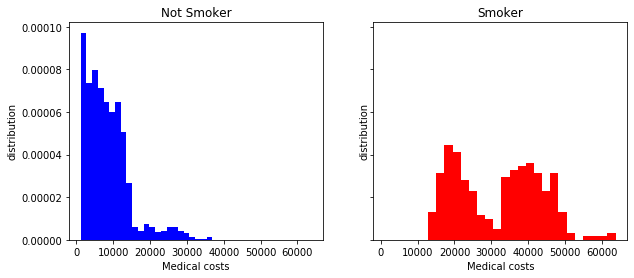

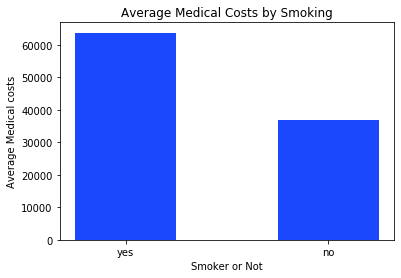

In [3]:
# your code here
fig,ax = plt.subplots(1,2, figsize=(10,4), sharey=True, sharex=True)
colors = ['b', 'r']

for i, g in enumerate(insure.groupby('smoker')):
  smoker = g[0]
  df = g[1]
  ax[i].hist(df['charges'], bins=23, density=True, color = colors[i])
  #ax[i].set_title(smoker)
  if (smoker=='no'):
    ax[i].set_title('Not Smoker')
  else:
    ax[i].set_title('Smoker')
  ax[i].set_xlabel('Medical costs')
  ax[i].set_ylabel('distribution')
    
    
fig, ax = plt.subplots()
ax.bar(insure['smoker'],insure['charges'],width=0.5, color="#1b48fc")
ax.set_xlabel('Smoker or Not')
ax.set_ylabel('Average Medical costs')
ax.set_title('Average Medical Costs by Smoking')

### Question 2

Create a visualization showing the relationship between BMI and medical costs. 

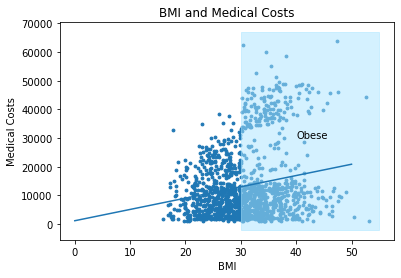

In [6]:
# your code here
#plot scatterplot
fig, ax = plt.subplots()
ax.scatter(insure['bmi'], insure['charges'], s=8)
ax.set_xlabel("BMI")
ax.set_ylabel("Medical Costs")
ax.set_title("BMI and Medical Costs")

#set background color
import matplotlib.colors as mplc
hue = 0.05
ax.fill_betweenx(ax.get_ylim(), 30, ax.get_xlim()[1], alpha=0.5, color=mplc.hsv_to_rgb((hue+0.5,1/3,1)))
ax.annotate('Obese', xy=(40,3e4))

#fit linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = insure["bmi"].values.reshape(-1, 1)
y = insure['charges'].values.reshape(-1, 1)
lr.fit(X, y)
x = np.linspace(0,50).reshape(-1, 1)
y_pred = lr.predict(x)
ax.plot(x, y_pred)

##### There's a positive relationship between medical cost and BMI, the likelihood of occuring very high medical cost is significantly higher in people with BMI higher than 30(obese) than those below 30.

### Question 3

Does the relationship between medical costs and BMI vary with gender? Create a visualization to answer this question.

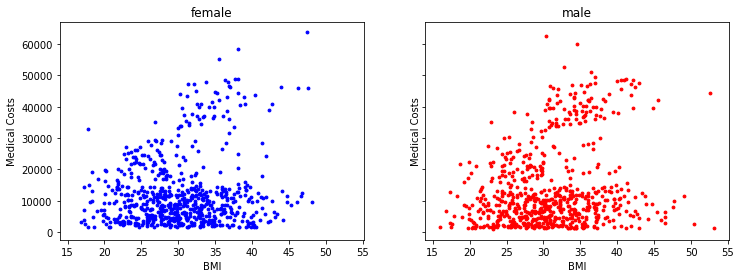

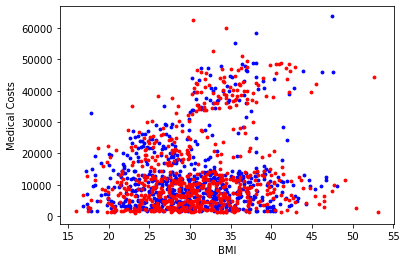

In [7]:
# your code here
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)
colors = ['b', 'r'] 

for i, g in enumerate(insure.groupby('sex')):
  sex=g[0]
  df = g[1]
  ax[i].set_title(sex)
  ax[i].set_ylabel("Medical Costs")
  ax[i].set_xlabel("BMI")
  ax[i].scatter(df['bmi'], df['charges'], s=8, color=colors[i])
    
#compare two distribution             
fig, ax = plt.subplots()
for i, g in enumerate(insure.groupby('sex')):
  sex=g[0]
  df = g[1]
  ax.set_ylabel("Medical Costs")
  ax.set_xlabel("BMI")
  ax.scatter(df['bmi'], df['charges'],s=8, color=colors[i])

##### Yes, from the scatterplot, the distributions are different in the female graph and male graph, thus relationship between medical costs and BMI vary by gender.

## Questions 4-5

In these questions you will build and evaluate a model to predict medical costs. 

First, we divide the data into training and testing sets. 

In [8]:
train = insure.sample(frac = 0.8,random_state = 42) 
test = insure.drop(train.index)

Now we create a numeric matrix of features from our dataframe. The formula interface from the patsy package is one convenient method for doing this.

In [9]:
y, X = patsy.dmatrices("charges ~ C(sex)*(age + children + C(smoker) + C(region)) + age:C(smoker)", insure, return_type='matrix')
y = y.flatten()
y_train = y[train.index]
X_train = X[train.index]
y_test = y[test.index]
X_test = X[test.index]

### Question 4

Fit a linear regression model to the training data. Print the MSE on the training and testing data.

In [11]:
# your code here
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

# construct the model instance
sqft_lr_model = linear_model.LinearRegression()

# fit the model
sqft_lr_model.fit(X_train, y_train)

# MSE
train_mse = metrics.mean_squared_error(y_train, sqft_lr_model.predict(X_train))
test_mse = metrics.mean_squared_error(y_test, sqft_lr_model.predict(X_test))

print(f"Linear regression training MSE = {train_mse}")
print(f"Linear regression testing MSE  = {test_mse}")


Linear regression training MSE = 38781234.24928245
Linear regression testing MSE  = 45740307.02477765


### Question 5

Fit a LASSO model to the training data. Follow along with the notes on regression to visualize the lasso path. `alpha`. Print the MSE on the training and testing data.

Lasso training MSE = 38781549.54087569
Lasso testing MSE  = 45709751.07084895


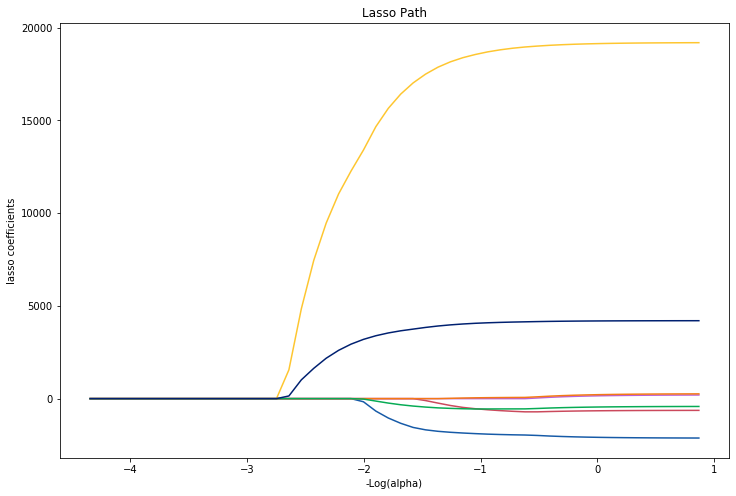

In [35]:
# your code here

# fit the model
lasso = linear_model.Lasso().fit(X_train,y_train)

# MSE
train_mse = metrics.mean_squared_error(y_train,lasso.predict(X_train))
test_mse = metrics.mean_squared_error(y_test,lasso.predict(X_test))
# R_squared = 1-metrics.mean_squared_error(y_train,lasso.predict(X_train))/y_train.var()

print(f"Lasso training MSE = {train_mse}")
print(f"Lasso testing MSE  = {test_mse}")

# Compute lasso for many alphas (the lasso path)
from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X_train, y_train, alphas=alphas, max_iter=10000)

colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']
# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)

for coef_l, c , name in zip(coefs_lasso, color_cycle , insure.iloc[:0]):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
  # i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
 #  xnote = log_alphas[i]
 #  ynote = coef_l[i]
  # ax.annotate(name,(xnote, ynote), color=c)
